In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, \
                            classification_report, \
                            confusion_matrix 

In [10]:
iris = load_iris() 

X = iris.data[:, (0, 1)] # petal length, petal width
y = (iris.target == 0).astype(np.int_)

n_samples, n_features = iris.data.shape

Text(0.5, 1.0, 'Petal Data')

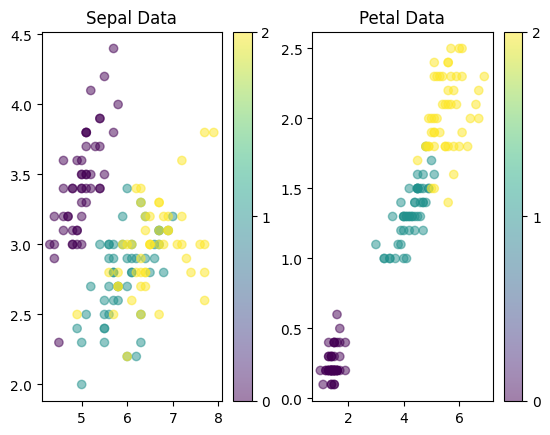

In [11]:
plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5, 
                           c=iris.target) 
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Sepal Data')

plt.subplot(1, 2, 2)
scatter_plot_2 = plt.scatter(iris.data[:,2], iris.data[:,3], alpha=0.5, 
                           c=iris.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Petal Data')

In [12]:
#Model Perceptron
class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation
    def fit(self, X, y):
            n_features = X.shape[1]
            # Initializing weights and bias
            self.weights = np.zeros((n_features))
            self.bias = 0

            # Iterating until the number of epochs
            for epoch in range(self.epochs):

                # Traversing through the entire training set
                for i in range(len(X)):
                    z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                    y_pred = self.activation(z) # Passing through an activation function

                    #Updating weights and bias
                    self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                    self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])

            return self.weights, self.bias
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [13]:
#Prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
perceptron = Perceptron(0.001, 100)
perceptron.fit(X_train, y_train)
pred = perceptron.predict(X_test)
accuracy_score(pred, y_test)

1.0

In [14]:
#Classification Report
report = classification_report(pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
#Calculate confusion matrix 
conf_matrix = confusion_matrix(y_test, pred) 

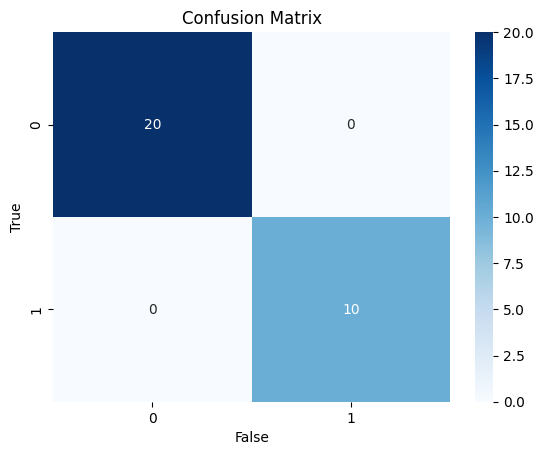

In [16]:
sns.heatmap(conf_matrix, annot = True, cmap= 'Blues') 
plt.ylabel('True') 
plt.xlabel('False') 
plt.title('Confusion Matrix') 
plt.show()